In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [189]:
# Load the dataset
data = pd.read_csv("/content/PCOS_final.csv")

In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sl. No            541 non-null    int64  
 1   BMI               541 non-null    float64
 2   FSH/LH            541 non-null    float64
 3   Waist(inch)       541 non-null    int64  
 4   Follicle No. (R)  541 non-null    int64  
 5   Follicle No. (L)  541 non-null    int64  
 6   Glucose           541 non-null    float64
 7   Stage             541 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 33.9 KB


In [202]:
data.columns

Index(['Sl. No', 'BMI', 'FSH/LH', 'Waist(inch)', 'Follicle No. (R)',
       'Follicle No. (L)', 'Stage'],
      dtype='object')

In [191]:
data = data.drop('Glucose', axis =1)


In [192]:
data

,Sl. No,BMI,FSH/LH,Waist(inch),Follicle No. (R),Follicle No. (L),Stage
0,1,19.3,2.16,30,3,3,0
1,2,24.9,6.17,32,5,3,0
2,3,25.3,6.30,36,15,13,2
3,4,29.7,3.42,36,2,2,0
4,5,20.1,4.42,30,4,3,0
...,...,...,...,...,...,...,...
536,537,18.5,5.56,26,0,1,0
537,538,25.3,1.79,32,7,9,0
538,539,23.4,4.30,28,0,1,0
539,540,22.2,1.02,26,6,7,0


In [193]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
#data['Stage'] = le.fit_transform(data['Stage'])
#data['Cellularity'] = le.fit_transform(data['Cellularity'])
#data['Nuclear Pleomorphism'] = le.fit_transform(data['Nuclear Pleomorphism'])
#data['Patient_ID'] = le.fit_transform(data['Patient_ID'])

In [194]:
data

,Sl. No,BMI,FSH/LH,Waist(inch),Follicle No. (R),Follicle No. (L),Stage
0,1,19.3,2.16,30,3,3,0
1,2,24.9,6.17,32,5,3,0
2,3,25.3,6.30,36,15,13,2
3,4,29.7,3.42,36,2,2,0
4,5,20.1,4.42,30,4,3,0
...,...,...,...,...,...,...,...
536,537,18.5,5.56,26,0,1,0
537,538,25.3,1.79,32,7,9,0
538,539,23.4,4.30,28,0,1,0
539,540,22.2,1.02,26,6,7,0


Text(0.5, 1.0, 'Correlation Heatmap')

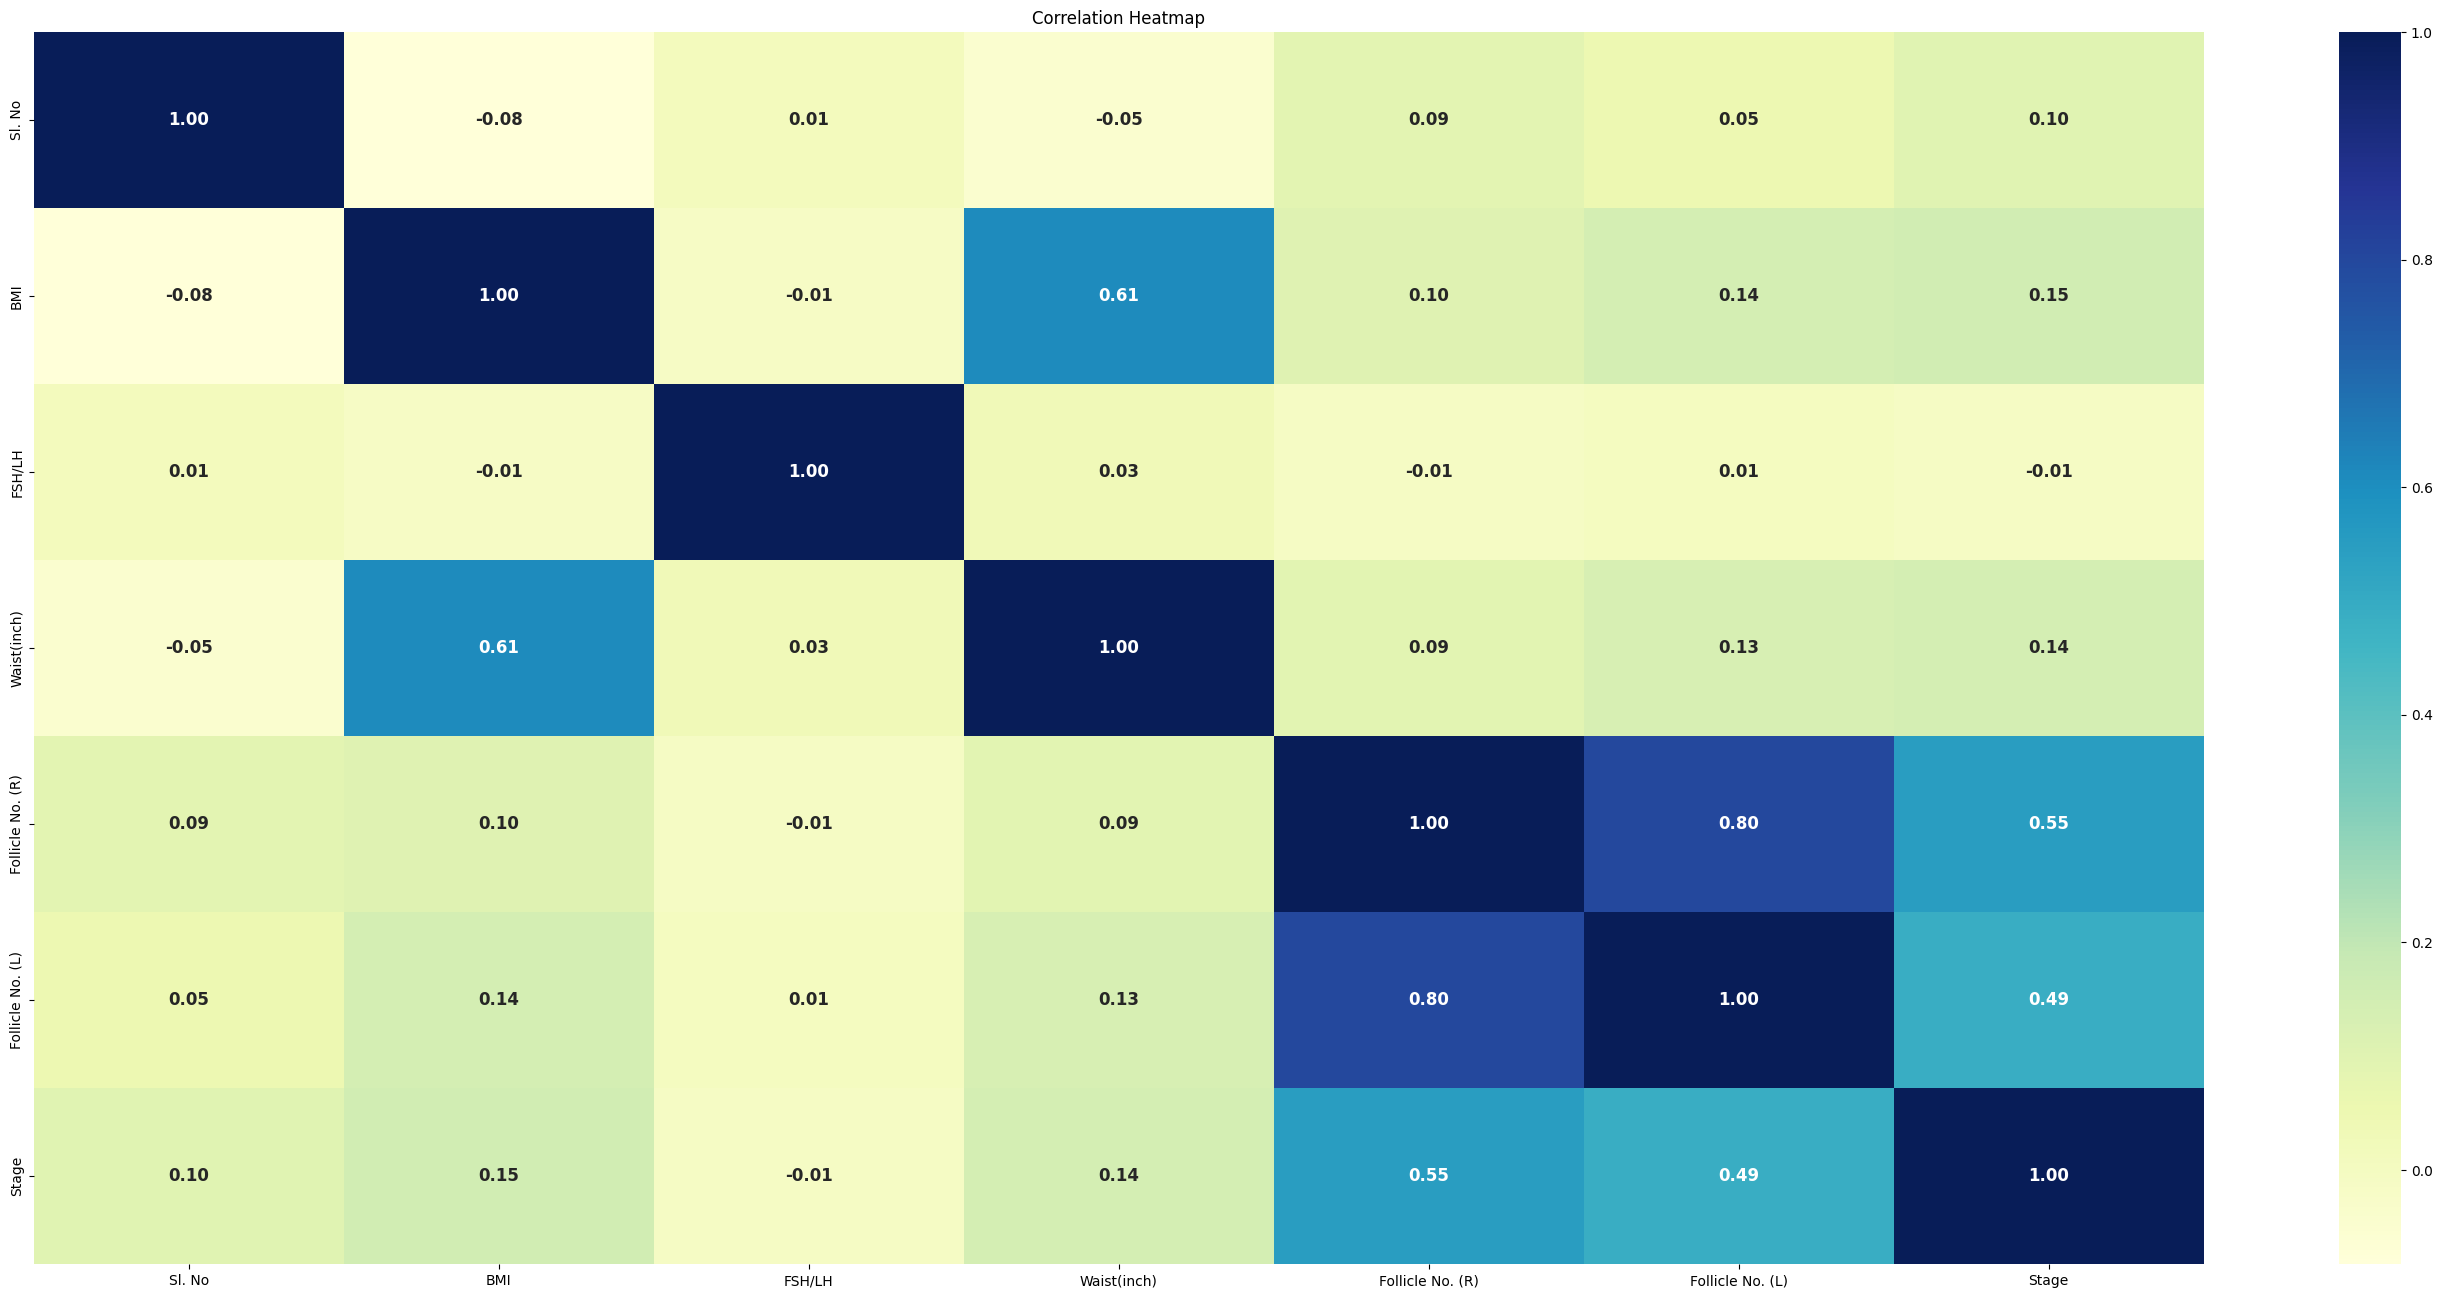

In [195]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = data.corr()
plt.figure(figsize = (35,16))
sns.heatmap(corr, annot = True, cmap = 'YlGnBu', fmt='.2f', annot_kws={'size': 12, 'fontweight': 'semibold'})
plt.title('Correlation Heatmap')

In [196]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [197]:
X = data.drop('Stage', axis=1)  # Features (input data)
y = data['Stage']  # Target variable (output)

In [198]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=275)

In [131]:
#Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [132]:
# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [199]:
# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)


In [200]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9724770642201835


In [203]:
new_input_data = pd.DataFrame({
    "Sl. No" : [1],
    "BMI" : [19.3],
    "FSH/LH" : [2.16],
    "Waist(inch)" : [30],
    "Follicle No. (R)" :[3],
    "Follicle No. (L)" : [3]
    # Add other features as needed1	19.3	2.16	30	3	3
})

In [205]:
# Make predictions on new input data
predicted_output = rf_classifier.predict(new_input_data)
print("Predicted PCOS Stage:", predicted_output)

Predicted PCOS Stage: [0]
